# Introduction

In [422]:
import tensorflow as tf

In [423]:
#check for gpu
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [424]:
#imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
plt.rcParams['figure.figsize']=(12,6)

In [425]:
#loading data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [426]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

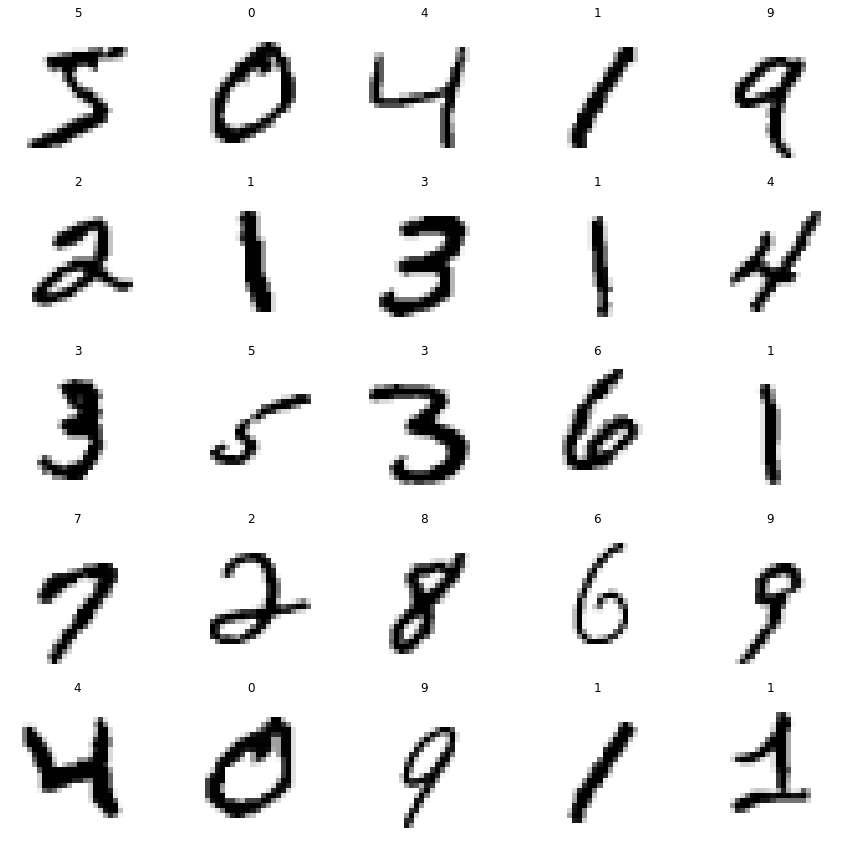

In [427]:
#data samples
plt.figure(figsize=(15,15))
x,y=5,5
for i in range(25):
    plt.subplot(x,y,i+1)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.title(y_train[i])
    plt.axis('off')



# Preparing Data

In [428]:
#converting dependent data to categorical
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [429]:
#reshaping data for model
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [430]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [431]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,AveragePooling2D,MaxPool2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [432]:
#early stop for avoid overfit
early_stop=EarlyStopping(patience=15)

# Generating More Images

In [433]:
img_gen=ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.09 ,
        width_shift_range=0.11,
        height_shift_range=0.11)


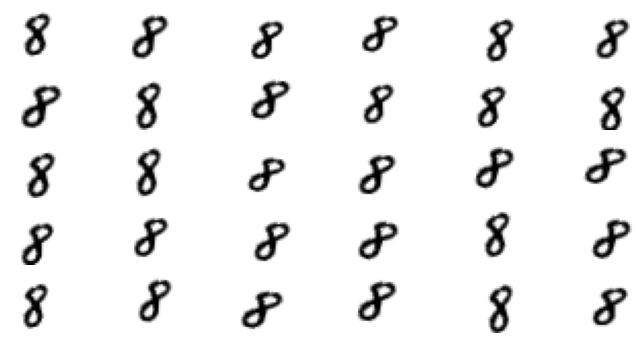

In [434]:
for i in range(30):  
    plt.subplot(5, 6, i+1)
    x_train_temp, y_train_temp =img_gen.flow(x_train[445].reshape(1,28,28,1),y_train[445].reshape(1,10)).next()
    plt.imshow(x_train_temp[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')

# Modelling

In [435]:
#Optimizers
opt1=tf.keras.optimizers.SGD(learning_rate=0.015,nesterov=True)
opt2=tf.keras.optimizers.RMSprop()
opt3=tf.keras.optimizers.Adam()

In [ ]:
results=np.zeros((10000,10))
for opt in(opt1,opt2,opt3):
    
    #model build > [[conv+batch norm]*2 + pooling + [conv+batch norm]*2]+flatten with swish activation function
    model=Sequential()

    #convolution
    model.add(Conv2D(filters=16,kernel_size=3,padding='valid',activation='swish',input_shape = (28, 28, 1)))
    model.add(BatchNormalization())
    #convolution
    model.add(Conv2D(filters=32,kernel_size=5,padding='same',activation='swish',strides=2))
    model.add(BatchNormalization())

    model.add(Dropout(.44))
    #pooling
    model.add(AveragePooling2D(pool_size=(2,2)))

    #convolution
    model.add(Conv2D(filters=64,kernel_size=3,padding='valid',activation='swish',strides=1))
    model.add(BatchNormalization())
    #convolution
    model.add(Conv2D(filters=128,kernel_size=5,padding='same',activation='swish',strides=2))
    model.add(BatchNormalization())

    model.add(Dropout(.44))


    #flattening
    model.add(Flatten())

    model.add(Dense(128,activation='swish'))
    model.add(Dropout(.44))
    model.add(Dense(10,activation='softmax'))
    
    #compile model with cross entropy loss
    model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])
    
    model.fit(img_gen.flow(x_train,y_train),epochs=50,validation_data=(x_test,y_test),callbacks=early_stop,verbose=1)
    results=results+model.predict(x_test);

Epoch 1/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5182 - accuracy: 0.8380 - val_loss: 0.0499 - val_accuracy: 0.9821
Epoch 2/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2056 - accuracy: 0.9383 - val_loss: 0.0396 - val_accuracy: 0.9867
Epoch 3/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1610 - accuracy: 0.9517 - val_loss: 0.0344 - val_accuracy: 0.9888
Epoch 4/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1321 - accuracy: 0.9601 - val_loss: 0.0258 - val_accuracy: 0.9915
Epoch 5/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1165 - accuracy: 0.9649 - val_loss: 0.0297 - val_accuracy: 0.9892
Epoch 6/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1104 - accuracy: 0.9678 - val_loss: 0.0286 - val_accuracy: 0.9897
Epoch 7/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1013 - accuracy: 0.9704 - val_loss: 0.0524 - val_ac

In [ ]:
#plotting scores
score=pd.DataFrame(model.history.history)
score[['loss','val_loss']].plot(title='Loss')
score[['accuracy','val_accuracy']].plot(title='Accuracy');

In [ ]:
#predicting x_test
y_pred=np.argmax(results,axis=1)

In [ ]:
#libs for report
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
y_test=np.argmax(y_test,axis=1)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
#creating dataframe to see errors
df_results=pd.DataFrame()
df_results['pred']=y_pred
df_results['real']=y_test

In [ ]:
df_comp=df_results[df_results['pred']!=df_results['real']]
df_comp.sample(10)

In [ ]:
#number of mispredictions
len(df_comp)

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
#lets checks how mispredictions looks like
#p=predict
#r=real
plt.figure(figsize=(10,25))
x,y=int(len(df_comp)/5)+1,5
for i in range(len(df_comp.index)):
    plt.subplot(x,y,i+1)
    plt.imshow(x_test[df_comp.index[i]],cmap=plt.cm.binary)
    plt.title(f'p={y_pred[df_comp.index[i]]} r={y_test[df_comp.index[i]]}')
    plt.axis('off')
